# Load libs

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import neighbors
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier

%matplotlib inline
pd.set_option("display.max_columns", 500)

# Load data

In [3]:
raw_training = pd.read_csv('fashion-mnist_train.csv')
print("Num examples = {}".format(raw_training.shape[0]))

raw_test = pd.read_csv('fashion-mnist_test.csv')
print("Num test examples = {}".format(raw_test.shape[0]))

X_train = raw_training.loc[:, 'pixel1':'pixel784']
Y_train = raw_training['label']

X_test = raw_test.loc[:, 'pixel1':'pixel784']
Y_test = raw_test['label']
print ("Num features: {}".format(X_train.shape[1]))

Num examples = 60000
Num test examples = 10000
Num features: 784


# Explore data

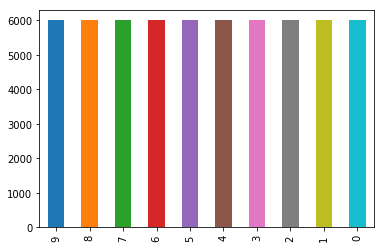

In [3]:
Y_train.value_counts().plot.bar()

In [4]:
X_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,...,pixel535,pixel536,pixel537,pixel538,pixel539,pixel540,pixel541,pixel542,pixel543,pixel544,pixel545,pixel546,pixel547,pixel548,pixel549,pixel550,pixel551,pixel552,pixel553,pixel554,pixel555,pixel556,pixel557,pixel558,pixel559,pixel560,pixel561,pixel562,pixel563,pixel564,pixel565,pixel566,pixel567,pixel568,pixel569,pixel570,pixel571,pixel572,pixel573,pixel574,pixel575,pixel576,pixel577,pixel578,pixel579,pixel580,pixel581,pixel582,pixel583,pixel584,pixel585,pixel586,pixel587,pixel588,pixel589,pixel590,pixel591,pixel592,pixel593,pixel594,pixel595,pixel596,pixel597,pixel598,pixel599,pixel600,pixel601,pixel602,pixel603,pixel604,pixel605,pixel606,pixel607,pixel608,pixel609,pixel610,pixel611,pixel612,pixel613,pixel614,pixel615,pixel616,pixel617,pixel618,pixel619,pixel620,pixel621,pixel622,pixel623,pixel624,pixel625,pixel626,pixel627,pixel628,pixel629,pixel630,pixel631,pixel632,pixel633,pixel634,pixel635,pixel636,pixel637,pixel638,pixel639,pixel640,pixel641,pixel642,pixel643,pixel644,pixel645,pixel646,pixel647,pixel648,pixel649,pixel650,pixel651,pixel652,pixel653,pixel654,pixel655,pixel656,pixel657,pixel658,pixel659,pixel660,pixel661,pixel662,pixel663,pixel664,pixel665,pixel666,pixel667,pixel668,pixel669,pixel670,pixel671,pixel672,pixel673,pixel674,pixel675,pixel676,pixel677,pixel678,pixel679,pixel680,pixel681,pixel682,pixel683,pixel684,pixel685,pixel686,pixel687,pixel688,pixel689,pixel690,pixel691,pixel692,pixel693,pixel694,pixel695,pixel696,pixel697,pixel698,pixel699,pixel700,pixel701,pixel702,pixel703,pixel704,pixel705,pixel706,pixel707,pixel708,pixel709,pixel710,pixel711,pixel712,pixel713,pixel714,pixel715,pixel716,pixel717,pixel718,pixel719,pixel720,pixel721,pixel722,pixel723,pixel724,pixel725,pixel726,pixel727,pixel728,pixel729,pixel730,pixel731,pixel732,pixel733,pixel734,pixel735,pixel736,pixel737,pixel738,pixel739,pixel740

# Normalize pixel values

In [5]:
X_train = X_train / 256
X_test = X_test / 256

# Nearest neighbors

In [42]:
def eval_classifier(clf, X_train, Y_train, X_test, Y_test, train_scores, test_scores):
    train_score = clf.score(X_train, Y_train)
    test_score = clf.score(X_test, Y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)

In [43]:
train_scores = []
test_scores = []
n_neighbors = [1,3,5,7,9,11,13,15, 17, 19, 21, 23, 25]
for k in n_neighbors:
    print ("Learning classification for n_neighbors = {}".format(k))
    clf = neighbors.KNeighborsClassifier(n_neighbors = k, n_jobs=-1)
    clf.fit(X_train, Y_train)
    print ("Calculating scores for n_neighbors = {}".format(k))
    eval_classifier(clf, X_train, Y_train, X_test, Y_test, train_scores, test_scores)

Learning classification for n_neighbors = 1
Calculating scores for n_neighbors = 1
Learning classification for n_neighbors = 3
Calculating scores for n_neighbors = 3
Learning classification for n_neighbors = 5
Calculating scores for n_neighbors = 5
Learning classification for n_neighbors = 7
Calculating scores for n_neighbors = 7
Learning classification for n_neighbors = 9
Calculating scores for n_neighbors = 9
Learning classification for n_neighbors = 11
Calculating scores for n_neighbors = 11
Learning classification for n_neighbors = 13
Calculating scores for n_neighbors = 13
Learning classification for n_neighbors = 15
Calculating scores for n_neighbors = 15
Learning classification for n_neighbors = 17
Calculating scores for n_neighbors = 17
Learning classification for n_neighbors = 21
Calculating scores for n_neighbors = 21
Learning classification for n_neighbors = 23
Calculating scores for n_neighbors = 23
Learning classification for n_neighbors = 25
Calculating scores for n_neigh

In [56]:
def plot(param_name, param_values, train_scores, test_scores):
    my_dict = {}
    my_dict[param_name] = param_values
    my_dict['train_scores'] = train_scores
    my_dict['test_scores'] = test_scores
    df = pd.DataFrame(my_dict)
    g = sns.relplot(x=param_name, y = 'value', hue="variable",
            kind="line", aspect=2.0,
            data=df.melt(id_vars=[param_name]))
    g.fig.get_axes()[0].set_ylabel('accuracy')
    plt.show()

In [50]:
n_dict = {}
n_dict['neighbors'] = n_neighbors
n_dict['train_scores'] = train_scores
n_dict['test_scores'] = test_scores
n_df = pd.DataFrame(n_dict)

In [62]:
n_df.to_csv("n_df.csv")

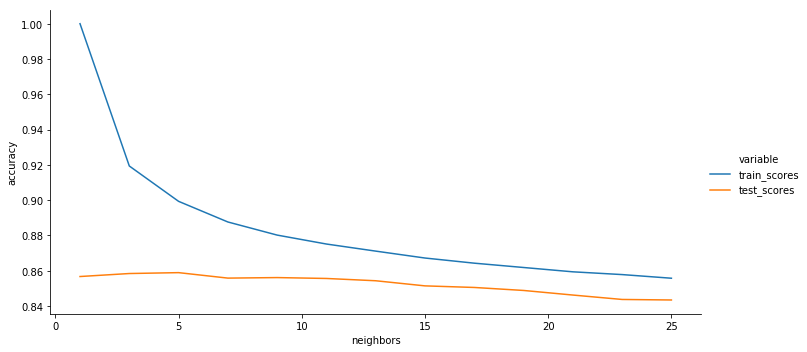

In [55]:
g = sns.relplot(x="neighbors", y = 'value', hue="variable",
            kind="line", aspect=2.0,
            data=n_df.melt(id_vars=['neighbors']))
g.fig.get_axes()[0].set_ylabel('accuracy')
plt.show()

# Decision Tree

In [ ]:
dt_train_scores = []
dt_test_scores = []
depths = range(2, 64, 2)
for depth in depths:
    print ("Learning classification for depth = {}".format(depth))
    dt = DecisionTreeClassifier(max_depth = depth)
    dt.fit(X_train, Y_train)
    print ("Calculating scores for depth = {}".format(depth))
    eval_classifier(dt, X_train, Y_train, X_test, Y_test, dt_train_scores, dt_test_scores)

Learning classification for depth = 2
Calculating scores for depth = 2
Learning classification for depth = 4
Calculating scores for depth = 4
Learning classification for depth = 6
Calculating scores for depth = 6
Learning classification for depth = 8
Calculating scores for depth = 8
Learning classification for depth = 10
Calculating scores for depth = 10
Learning classification for depth = 12
Calculating scores for depth = 12
Learning classification for depth = 14
Calculating scores for depth = 14
Learning classification for depth = 16
Calculating scores for depth = 16
Learning classification for depth = 18
Calculating scores for depth = 18
Learning classification for depth = 20
Calculating scores for depth = 20
Learning classification for depth = 22
Calculating scores for depth = 22
Learning classification for depth = 24
Calculating scores for depth = 24
Learning classification for depth = 26
Calculating scores for depth = 26
Learning classification for depth = 28
Calculating scores f

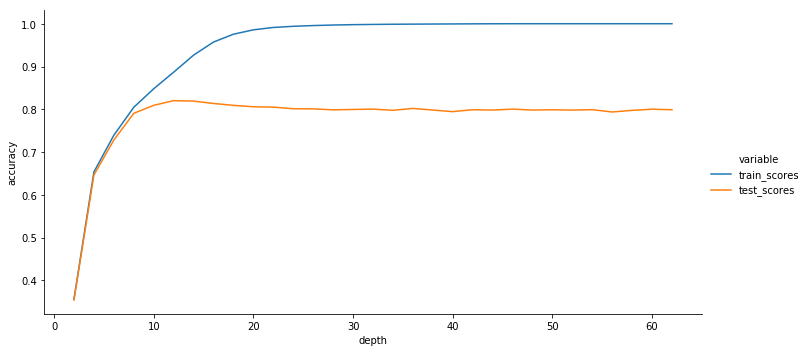

In [61]:
plot("depth", depths, dt_train_scores, dt_test_scores)

# Logistic Regression

In [27]:
Cs = [0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1.0, 3.0, 10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0, 10000.0] 
penalties = ["l1", "l2"]
multi_classes = ["ovr", "multinomial"]
values_dict = {}
values_dict["C"] = []
values_dict["penalty"] = []
values_dict["class"] = []
values_dict["training_score"] = []
values_dict["test_score"] = []

for c in Cs:
    for penalty in penalties:
        for multi_class in multi_classes:
            print ("Trying out LR with C: {}, penalty: {}, class: {}".format(c, penalty, multi_class))
            lr = LogisticRegression(penalty = penalty, C = c, solver='saga',multi_class=multi_class, n_jobs = -1)
            lr.fit(X_train, Y_train)
            print ("Scoring LR ...")
            train_score = lr.score(X_train, Y_train)
            test_score = lr.score(X_test, Y_test)
            values_dict["C"].append(c)
            values_dict["penalty"].append(penalty)
            values_dict["class"].append(multi_class)
            values_dict["training_score"].append(train_score)
            values_dict["test_score"].append(test_score)
            
df = pd.DataFrame(values_dict)

Trying out LR with C: 0.0001, penalty: l1, class: ovr
Scoring LR ...
Trying out LR with C: 0.0001, penalty: l1, class: multinomial
Scoring LR ...
Trying out LR with C: 0.0001, penalty: l2, class: ovr
Scoring LR ...
Trying out LR with C: 0.0001, penalty: l2, class: multinomial
Scoring LR ...
Trying out LR with C: 0.0003, penalty: l1, class: ovr
Scoring LR ...
Trying out LR with C: 0.0003, penalty: l1, class: multinomial
Scoring LR ...
Trying out LR with C: 0.0003, penalty: l2, class: ovr
Scoring LR ...
Trying out LR with C: 0.0003, penalty: l2, class: multinomial
Scoring LR ...
Trying out LR with C: 0.001, penalty: l1, class: ovr


/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Scoring LR ...
Trying out LR with C: 0.001, penalty: l1, class: multinomial


/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Scoring LR ...
Trying out LR with C: 0.001, penalty: l2, class: ovr
Scoring LR ...
Trying out LR with C: 0.001, penalty: l2, class: multinomial
Scoring LR ...
Trying out LR with C: 0.003, penalty: l1, class: ovr


/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The ma

Scoring LR ...
Trying out LR with C: 0.003, penalty: l1, class: multinomial


/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Scoring LR ...
Trying out LR with C: 0.003, penalty: l2, class: ovr
Scoring LR ...
Trying out LR with C: 0.003, penalty: l2, class: multinomial
Scoring LR ...
Trying out LR with C: 0.01, penalty: l1, class: ovr


/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The ma

Scoring LR ...
Trying out LR with C: 0.01, penalty: l1, class: multinomial


/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Scoring LR ...
Trying out LR with C: 0.01, penalty: l2, class: ovr
Scoring LR ...
Trying out LR with C: 0.01, penalty: l2, class: multinomial
Scoring LR ...
Trying out LR with C: 0.03, penalty: l1, class: ovr


/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The ma

Scoring LR ...
Trying out LR with C: 0.03, penalty: l1, class: multinomial


/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Scoring LR ...
Trying out LR with C: 0.03, penalty: l2, class: ovr
Scoring LR ...
Trying out LR with C: 0.03, penalty: l2, class: multinomial
Scoring LR ...
Trying out LR with C: 0.1, penalty: l1, class: ovr


/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The ma

Scoring LR ...
Trying out LR with C: 0.1, penalty: l1, class: multinomial


/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Scoring LR ...
Trying out LR with C: 0.1, penalty: l2, class: ovr


/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The ma

Scoring LR ...
Trying out LR with C: 0.1, penalty: l2, class: multinomial


/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Scoring LR ...
Trying out LR with C: 0.3, penalty: l1, class: ovr


/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The ma

Scoring LR ...
Trying out LR with C: 0.3, penalty: l1, class: multinomial


/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Scoring LR ...
Trying out LR with C: 0.3, penalty: l2, class: ovr


/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The ma

Scoring LR ...
Trying out LR with C: 0.3, penalty: l2, class: multinomial


/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Scoring LR ...
Trying out LR with C: 1.0, penalty: l1, class: ovr


/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The ma

Scoring LR ...
Trying out LR with C: 1.0, penalty: l1, class: multinomial


/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Scoring LR ...
Trying out LR with C: 1.0, penalty: l2, class: ovr


/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The ma

Scoring LR ...
Trying out LR with C: 1.0, penalty: l2, class: multinomial


/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Scoring LR ...
Trying out LR with C: 3.0, penalty: l1, class: ovr


/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The ma

Scoring LR ...
Trying out LR with C: 3.0, penalty: l1, class: multinomial


/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Scoring LR ...
Trying out LR with C: 3.0, penalty: l2, class: ovr


/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The ma

Scoring LR ...
Trying out LR with C: 3.0, penalty: l2, class: multinomial


/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Scoring LR ...
Trying out LR with C: 10.0, penalty: l1, class: ovr


/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The ma

Scoring LR ...
Trying out LR with C: 10.0, penalty: l1, class: multinomial


/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Scoring LR ...
Trying out LR with C: 10.0, penalty: l2, class: ovr


/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The ma

Scoring LR ...
Trying out LR with C: 10.0, penalty: l2, class: multinomial


/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Scoring LR ...
Trying out LR with C: 30.0, penalty: l1, class: ovr


/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The ma

Scoring LR ...
Trying out LR with C: 30.0, penalty: l1, class: multinomial


/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Scoring LR ...
Trying out LR with C: 30.0, penalty: l2, class: ovr


/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The ma

Scoring LR ...
Trying out LR with C: 30.0, penalty: l2, class: multinomial


/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Scoring LR ...
Trying out LR with C: 100.0, penalty: l1, class: ovr


/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The ma

Scoring LR ...
Trying out LR with C: 100.0, penalty: l1, class: multinomial


/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Scoring LR ...
Trying out LR with C: 100.0, penalty: l2, class: ovr


/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The ma

Scoring LR ...
Trying out LR with C: 100.0, penalty: l2, class: multinomial


/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Scoring LR ...
Trying out LR with C: 300.0, penalty: l1, class: ovr


/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The ma

Scoring LR ...
Trying out LR with C: 300.0, penalty: l1, class: multinomial


/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Scoring LR ...
Trying out LR with C: 300.0, penalty: l2, class: ovr


/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The ma

Scoring LR ...
Trying out LR with C: 300.0, penalty: l2, class: multinomial


/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Scoring LR ...
Trying out LR with C: 1000.0, penalty: l1, class: ovr


/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The ma

Scoring LR ...
Trying out LR with C: 1000.0, penalty: l1, class: multinomial


/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Scoring LR ...
Trying out LR with C: 1000.0, penalty: l2, class: ovr


/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The ma

Scoring LR ...
Trying out LR with C: 1000.0, penalty: l2, class: multinomial


/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Scoring LR ...
Trying out LR with C: 3000.0, penalty: l1, class: ovr


/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The ma

Scoring LR ...
Trying out LR with C: 3000.0, penalty: l1, class: multinomial


/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Scoring LR ...
Trying out LR with C: 3000.0, penalty: l2, class: ovr


/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The ma

Scoring LR ...
Trying out LR with C: 3000.0, penalty: l2, class: multinomial


/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Scoring LR ...
Trying out LR with C: 10000.0, penalty: l1, class: ovr


/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The ma

Scoring LR ...
Trying out LR with C: 10000.0, penalty: l1, class: multinomial


/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Scoring LR ...
Trying out LR with C: 10000.0, penalty: l2, class: ovr


/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The ma

Scoring LR ...
Trying out LR with C: 10000.0, penalty: l2, class: multinomial
Scoring LR ...


/home/p.narang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [29]:
lr_dataframe = pd.DataFrame(values_dict)

In [31]:
lr_dataframe.to_csv("lr_dataframe.csv")

In [103]:
lr_l2_dataframe = lr_dataframe.loc[df['penalty'] == 'l2']

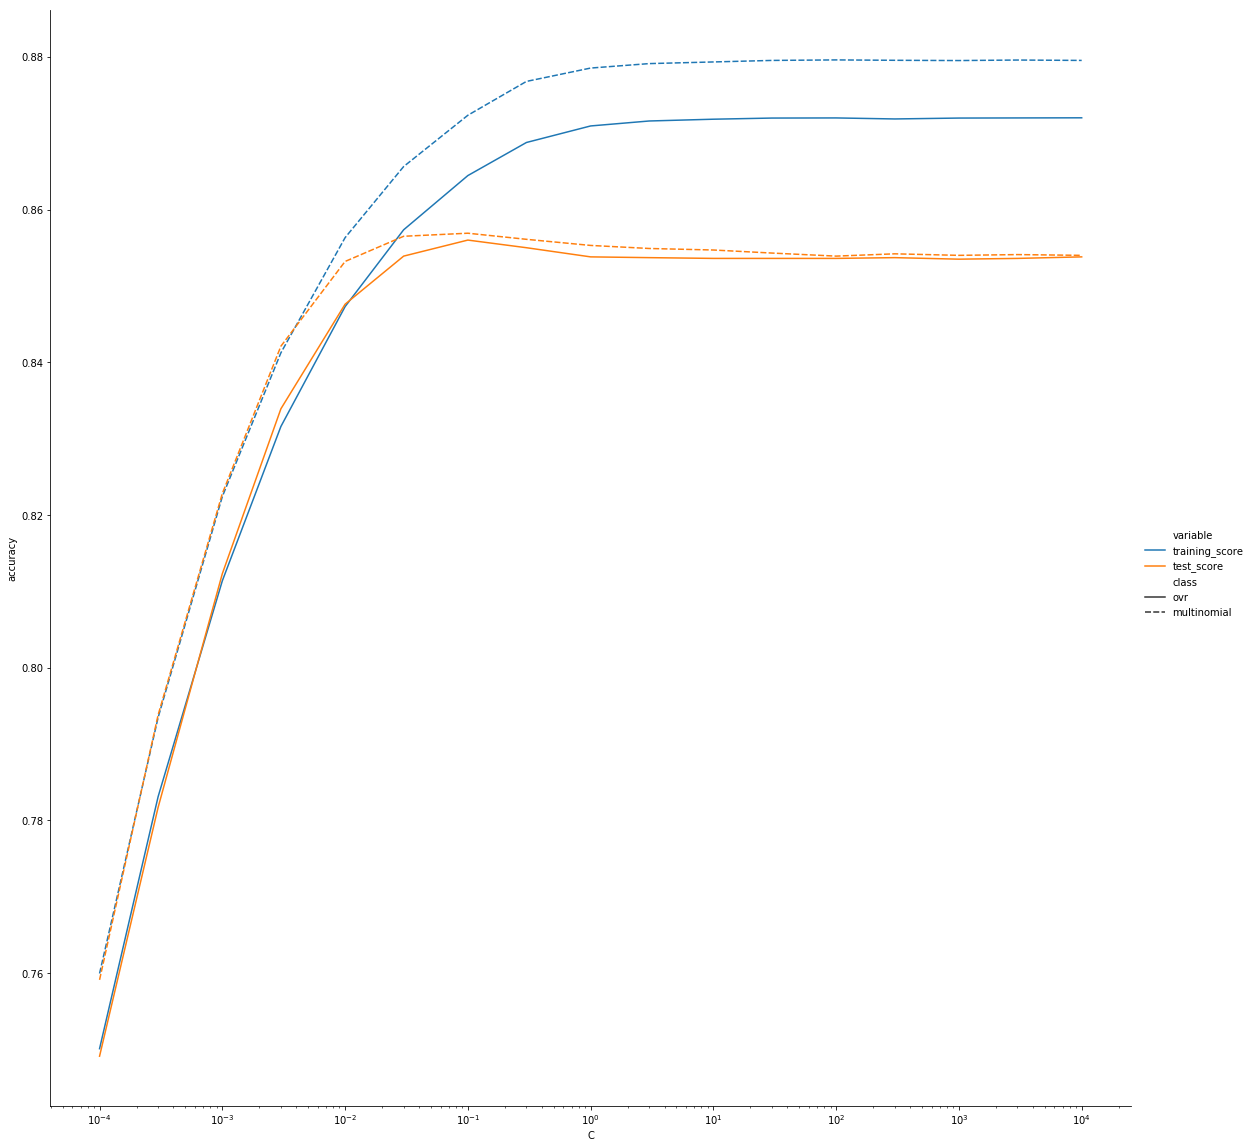

In [105]:
g = sns.relplot(x="C", y = 'value', hue="variable",
            style="class",
            kind="line", height = 16.0,
            data=lr_l2_dataframe.melt(id_vars=['C', 'penalty', 'class']))
g.fig.get_axes()[0].set_ylabel('accuracy')
g.fig.get_axes()[0].set_xscale('log')
plt.show()

# Random Forests

In [8]:
rf_dict = {}
rf_dict["tree_size"] = []
rf_dict["max_depth"] = []
rf_dict["training_score"] = []
rf_dict["test_score"] = []

for tree_size in range(10, 101, 10):
    for depth in range(2, 17, 2):
        print ("Trying out Random Forest with tree_size: {}, depth: {}".format(tree_size, depth))
        fr = RandomForestClassifier(n_estimators=tree_size, max_depth=depth, n_jobs = -1)
        fr.fit(X_train, Y_train)
        print ("Scoring RF ...")
        train_score = fr.score(X_train, Y_train)
        test_score = fr.score(X_test, Y_test)
        rf_dict["tree_size"].append(tree_size)
        rf_dict["max_depth"].append(depth)
        rf_dict["training_score"].append(train_score)
        rf_dict["test_score"].append(test_score)

rf_dataframe = pd.DataFrame(rf_dict)

Trying out Random Forest with tree_size: 10, depth: 2
Scoring RF ...
Trying out Random Forest with tree_size: 10, depth: 4
Scoring RF ...
Trying out Random Forest with tree_size: 10, depth: 6
Scoring RF ...
Trying out Random Forest with tree_size: 10, depth: 8
Scoring RF ...
Trying out Random Forest with tree_size: 10, depth: 10
Scoring RF ...
Trying out Random Forest with tree_size: 10, depth: 12
Scoring RF ...
Trying out Random Forest with tree_size: 10, depth: 14
Scoring RF ...
Trying out Random Forest with tree_size: 10, depth: 16
Scoring RF ...
Trying out Random Forest with tree_size: 20, depth: 2
Scoring RF ...
Trying out Random Forest with tree_size: 20, depth: 4
Scoring RF ...
Trying out Random Forest with tree_size: 20, depth: 6
Scoring RF ...
Trying out Random Forest with tree_size: 20, depth: 8
Scoring RF ...
Trying out Random Forest with tree_size: 20, depth: 10
Scoring RF ...
Trying out Random Forest with tree_size: 20, depth: 12
Scoring RF ...
Trying out Random Forest wit

In [147]:
rf_10_dataframe = rf_dataframe.loc[rf_dataframe['max_depth'] == 10]
rf_12_dataframe = rf_dataframe.loc[rf_dataframe['max_depth'] == 12]

In [143]:
rf_dataframe = rf_dataframe.rename(index=str, columns={"tree_size": "n_estimators"})

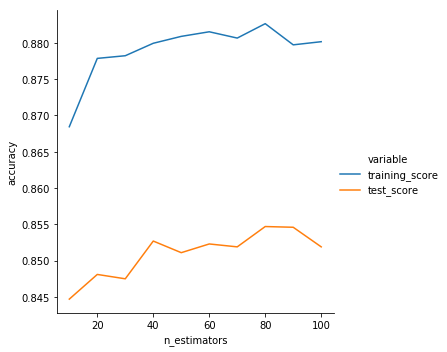

In [148]:
g = sns.relplot(x="n_estimators", y = 'accuracy', hue="variable",
            kind="line", # col="max_depth", col_wrap=2,
            data=rf_10_dataframe.melt(id_vars=['n_estimators', 'max_depth'], value_name='accuracy'))
g.fig.get_axes()[0].set_ylabel('accuracy')
plt.show()

# SVM - Linear

In [13]:
Cs = [0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1.0, 3.0, 10.0, 30.0, 100.0]
lsvm_dict = {}
lsvm_dict["C"] = []
lsvm_dict["training_score"] = []
lsvm_dict["test_score"] = []

for c in Cs:
    print ("Trying out Linear SVM with C: {}".format(c))
    lsvc = LinearSVC(C = c)
    lsvc.fit(X_train, Y_train)
    print ("Scoring SVM ...")
    train_score = lsvc.score(X_train, Y_train)
    test_score = lsvc.score(X_test, Y_test)
    lsvm_dict["C"].append(c)
    lsvm_dict["training_score"].append(train_score)
    lsvm_dict["test_score"].append(test_score)
            
lsvm_dataframe = pd.DataFrame(lsvm_dict)

Trying out Linear SVM with C: 0.0001
Scoring SVM ...
Trying out Linear SVM with C: 0.0003
Scoring SVM ...
Trying out Linear SVM with C: 0.001
Scoring SVM ...
Trying out Linear SVM with C: 0.003
Scoring SVM ...
Trying out Linear SVM with C: 0.01
Scoring SVM ...
Trying out Linear SVM with C: 0.03
Scoring SVM ...
Trying out Linear SVM with C: 0.1
Scoring SVM ...
Trying out Linear SVM with C: 0.3
Scoring SVM ...
Trying out Linear SVM with C: 1.0
Scoring SVM ...
Trying out Linear SVM with C: 3.0
Scoring SVM ...
Trying out Linear SVM with C: 10.0
Scoring SVM ...
Trying out Linear SVM with C: 30.0
Scoring SVM ...
Trying out Linear SVM with C: 100.0
Scoring SVM ...


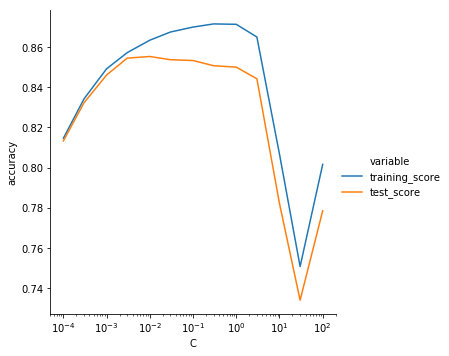

In [150]:
g = sns.relplot(x="C", y = 'accuracy', hue="variable",
            kind="line", # col="max_depth", col_wrap=2,
            data=lsvm_dataframe.melt(id_vars=['C'], value_name='accuracy'))
g.fig.get_axes()[0].set_ylabel('accuracy')
g.fig.get_axes()[0].set_xscale('log')
plt.show()

# SVM - Non Linear

In [26]:
svm_dict = {}
svm_dict["C"] = []
svm_dict["gamma"] = []
svm_dict["training_score"] = []
svm_dict["test_score"] = []
Cs = [0.001, 0.01, 0.1, 1.0]
gammas = [0.001, 0.01, 0.1, 1.0]
for c in Cs:
    for gamma in gammas:
        print ("Trying out SVM with C: {} and gamma: {}".format(c, gamma))
        svc = SVC(C = c, gamma = gamma, cache_size=8000)
        svc.fit(X_train, Y_train)
        print ("Scoring SVM ...")
        train_score = svc.score(X_train, Y_train)
        test_score = svc.score(X_test, Y_test)
        svm_dict["C"].append(c)
        svm_dict["gamma"].append(gamma)
        svm_dict["training_score"].append(train_score)
        svm_dict["test_score"].append(test_score)
            
svm_dataframe = pd.DataFrame(svm_dict)

Trying out SVM with C: 0.001 and gamma: 0.001
Scoring SVM ...
Trying out SVM with C: 0.001 and gamma: 0.01
Scoring SVM ...
Trying out SVM with C: 0.001 and gamma: 0.1
Scoring SVM ...
Trying out SVM with C: 0.001 and gamma: 1.0
Scoring SVM ...
Trying out SVM with C: 0.01 and gamma: 0.001
Scoring SVM ...
Trying out SVM with C: 0.01 and gamma: 0.01
Scoring SVM ...
Trying out SVM with C: 0.01 and gamma: 0.1
Scoring SVM ...
Trying out SVM with C: 0.01 and gamma: 1.0
Scoring SVM ...
Trying out SVM with C: 0.1 and gamma: 0.001
Scoring SVM ...
Trying out SVM with C: 0.1 and gamma: 0.01
Scoring SVM ...
Trying out SVM with C: 0.1 and gamma: 0.1
Scoring SVM ...
Trying out SVM with C: 0.1 and gamma: 1.0
Scoring SVM ...
Trying out SVM with C: 1.0 and gamma: 0.001
Scoring SVM ...
Trying out SVM with C: 1.0 and gamma: 0.01
Scoring SVM ...
Trying out SVM with C: 1.0 and gamma: 0.1
Scoring SVM ...
Trying out SVM with C: 1.0 and gamma: 1.0
Scoring SVM ...


In [32]:
svm_dataframe
svm_dataframe.to_csv("svm_dataframe.csv")

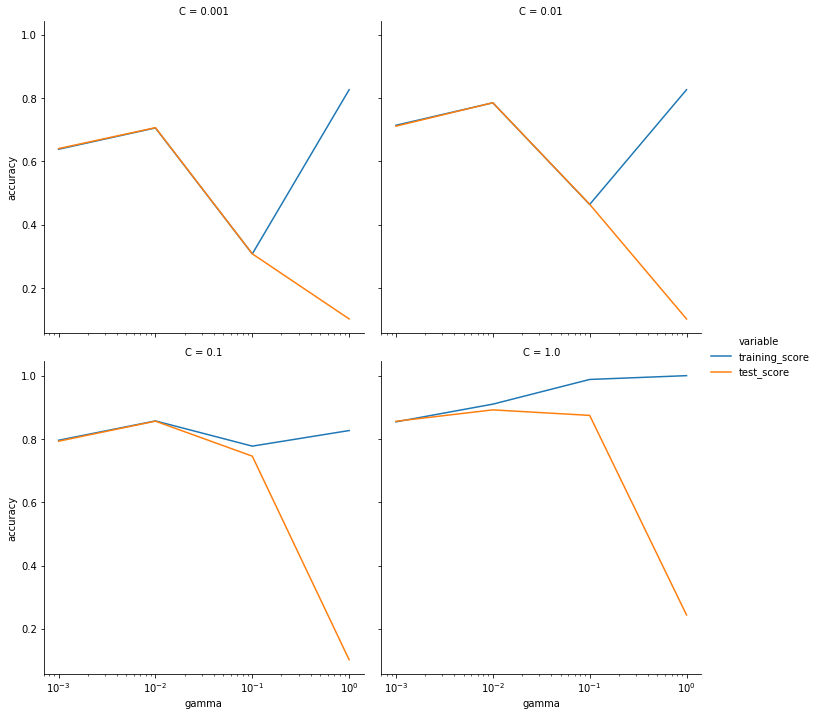

In [154]:
g = sns.relplot(x="gamma", y = 'accuracy', hue="variable",
            kind="line", col="C", col_wrap=2,
            data=svm_dataframe.melt(id_vars=['gamma', "C"], value_name='accuracy'))
g.fig.get_axes()[0].set_ylabel('accuracy')
g.fig.get_axes()[0].set_xscale('log')
plt.show()

# MLP

In [16]:
mlp_dict = {}
mlp_dict["alpha"] = []
mlp_dict["activation"] = []
mlp_dict["training_score"] = []
mlp_dict["test_score"] = []
alphas = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0]
activation_fns = ['identity', 'logistic', 'tanh', 'relu']
for alpha in alphas:
    for activation in activation_fns:
        print ("Trying out MLP with alpha: {} and activation: {}".format(alpha, activation))
        mlp = MLPClassifier(alpha = alpha, activation = activation)
        mlp.fit(X_train, Y_train)
        train_score = mlp.score(X_train, Y_train)
        test_score = mlp.score(X_test, Y_test)
        mlp_dict["alpha"].append(alpha)
        mlp_dict["activation"].append(activation)
        mlp_dict["training_score"].append(train_score)
        mlp_dict["test_score"].append(test_score)

mlp_dataframe = pd.DataFrame(mlp_dict)

Trying out MLP with alpha: 1e-05 and activation: identity
Trying out MLP with alpha: 1e-05 and activation: logistic
Trying out MLP with alpha: 1e-05 and activation: tanh
Trying out MLP with alpha: 1e-05 and activation: relu
Trying out MLP with alpha: 0.0001 and activation: identity
Trying out MLP with alpha: 0.0001 and activation: logistic
Trying out MLP with alpha: 0.0001 and activation: tanh
Trying out MLP with alpha: 0.0001 and activation: relu
Trying out MLP with alpha: 0.001 and activation: identity
Trying out MLP with alpha: 0.001 and activation: logistic
Trying out MLP with alpha: 0.001 and activation: tanh
Trying out MLP with alpha: 0.001 and activation: relu
Trying out MLP with alpha: 0.01 and activation: identity
Trying out MLP with alpha: 0.01 and activation: logistic
Trying out MLP with alpha: 0.01 and activation: tanh
Trying out MLP with alpha: 0.01 and activation: relu
Trying out MLP with alpha: 0.1 and activation: identity
Trying out MLP with alpha: 0.1 and activation: l

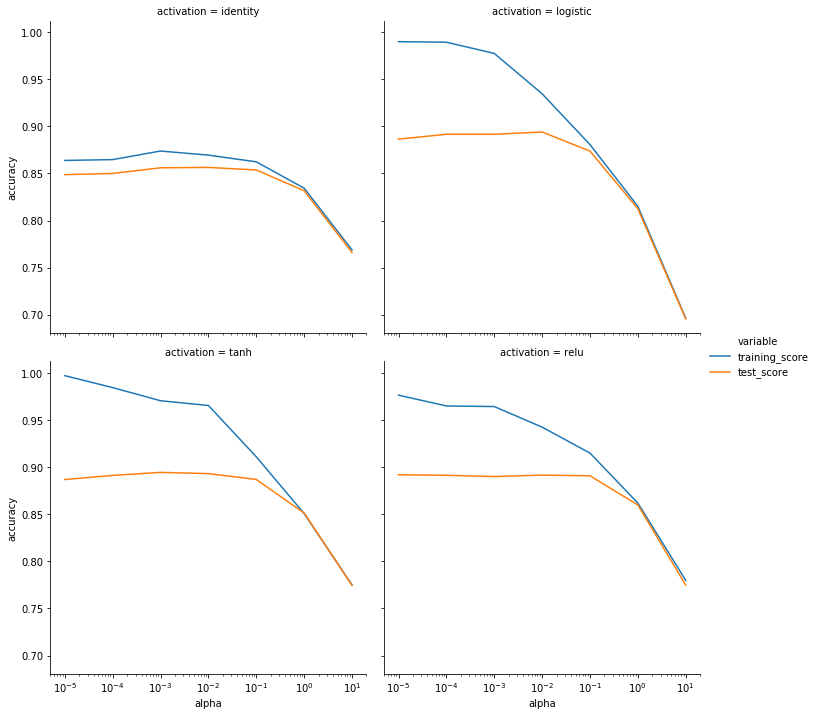

In [156]:
g = sns.relplot(x="alpha", y = 'accuracy', hue="variable",
            col="activation", col_wrap=2,
            kind="line", estimator=None, 
            data=mlp_dataframe.melt(id_vars=['activation', 'alpha'], value_name='accuracy'))
g.fig.get_axes()[0].set_xscale('log')
plt.show()

# ADABoost

In [161]:
ada_dict = {}
ada_dict["n_estimators"] = []
ada_dict["learning_rate"] = []
ada_dict["training_score"] = []
ada_dict["test_score"] = []
learning_rates = [0.03, 0.3]
n_estimators = [20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]
for n_estimator in n_estimators:
    for learning_rate in learning_rates:
        print ("Trying out AdaBoost with n_estimators: {} and learning_rate: {}".format(n_estimator, learning_rate))
        ada = AdaBoostClassifier(n_estimators=n_estimator, learning_rate=learning_rate)
        ada.fit(X_train, Y_train)
        train_score = ada.score(X_train, Y_train)
        test_score = ada.score(X_test, Y_test)
        ada_dict["n_estimators"].append(n_estimator)
        ada_dict["learning_rate"].append(learning_rate)
        ada_dict["training_score"].append(train_score)
        ada_dict["test_score"].append(test_score)

ada_dataframe = pd.DataFrame(ada_dict)

Trying out AdaBoost with n_estimators: 20 and learning_rate: 0.03
Trying out AdaBoost with n_estimators: 20 and learning_rate: 0.3
Trying out AdaBoost with n_estimators: 30 and learning_rate: 0.03
Trying out AdaBoost with n_estimators: 30 and learning_rate: 0.3
Trying out AdaBoost with n_estimators: 40 and learning_rate: 0.03
Trying out AdaBoost with n_estimators: 40 and learning_rate: 0.3
Trying out AdaBoost with n_estimators: 50 and learning_rate: 0.03
Trying out AdaBoost with n_estimators: 50 and learning_rate: 0.3
Trying out AdaBoost with n_estimators: 60 and learning_rate: 0.03
Trying out AdaBoost with n_estimators: 60 and learning_rate: 0.3
Trying out AdaBoost with n_estimators: 70 and learning_rate: 0.03
Trying out AdaBoost with n_estimators: 70 and learning_rate: 0.3
Trying out AdaBoost with n_estimators: 80 and learning_rate: 0.03
Trying out AdaBoost with n_estimators: 80 and learning_rate: 0.3
Trying out AdaBoost with n_estimators: 90 and learning_rate: 0.03
Trying out AdaBoo

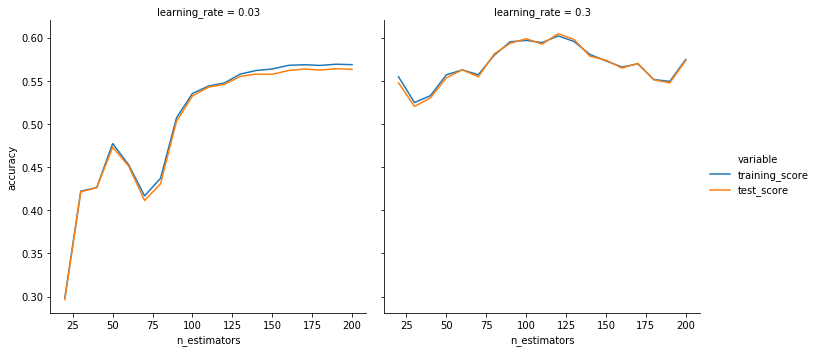

In [162]:
g = sns.relplot(x="n_estimators", y = 'accuracy', hue="variable",
            kind="line", col="learning_rate", col_wrap=2,
            data=ada_dataframe.melt(id_vars=['n_estimators', "learning_rate"], value_name='accuracy'))
g.fig.get_axes()[0].set_ylabel('accuracy')
plt.show()